In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\Deepak Raj\Desktop\Data_Science\Machine Learning\Data\Mall_Customers.csv')

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Basic checks

In [4]:
#information about given data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#shape
df.shape

(200, 5)

In [6]:
#statistics information
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Exploratory Data analysis

## Univariate data analysis


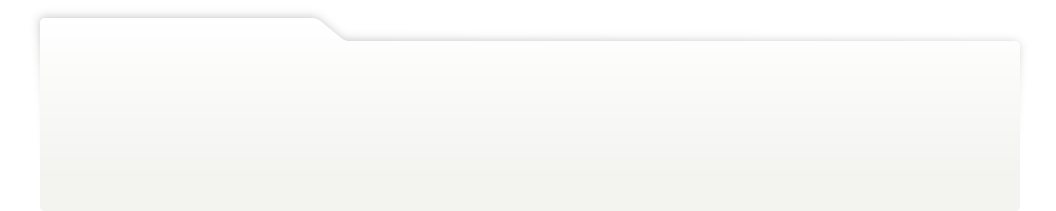
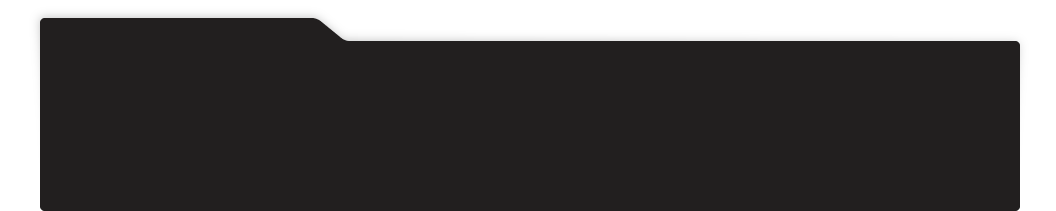
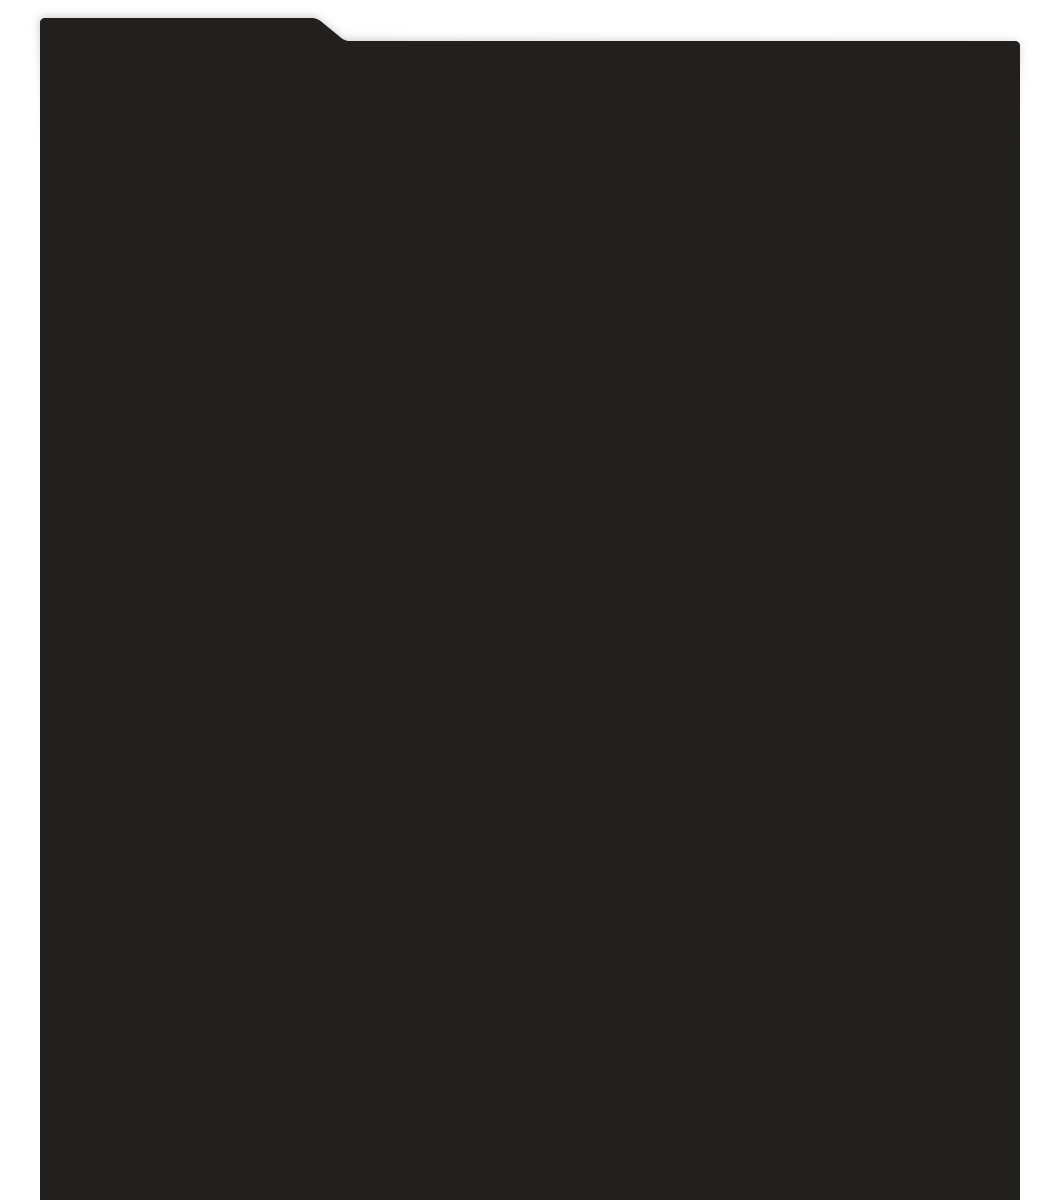
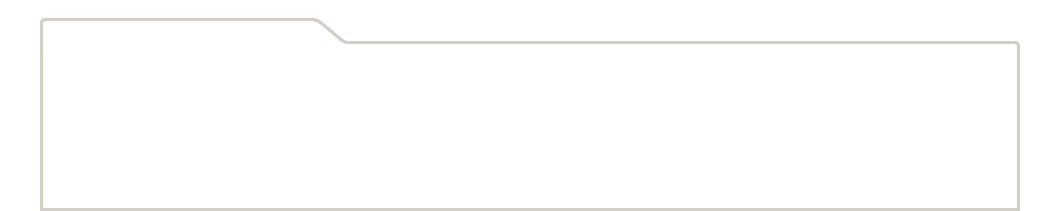
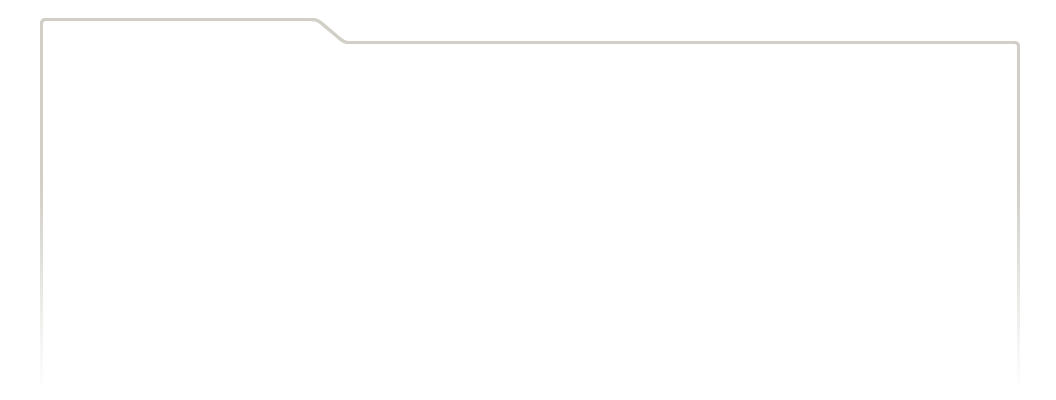
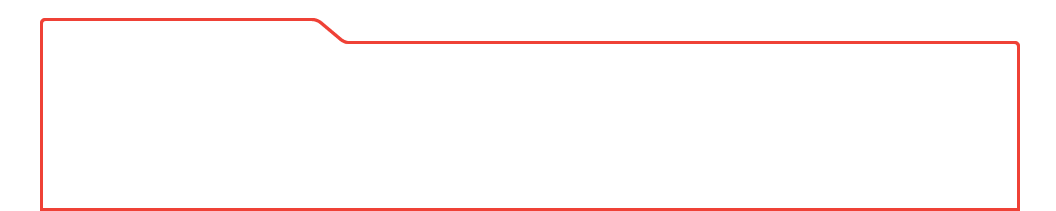
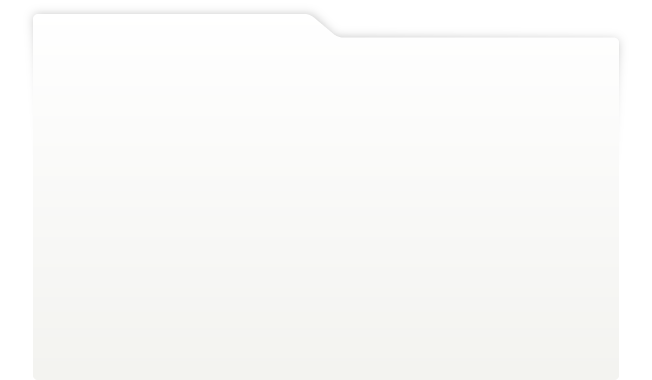
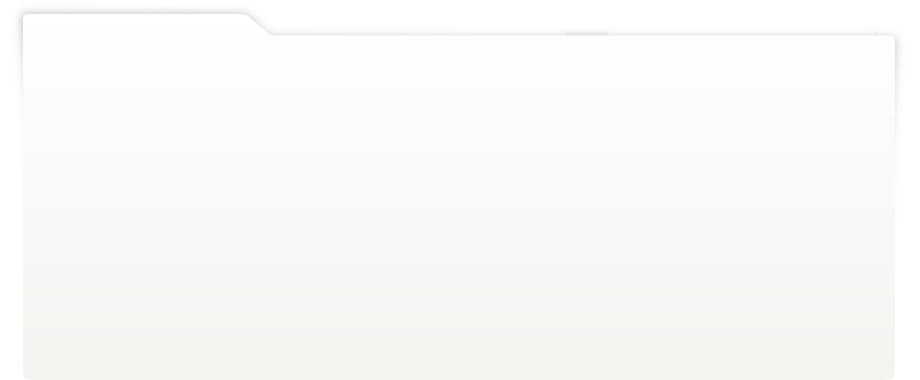
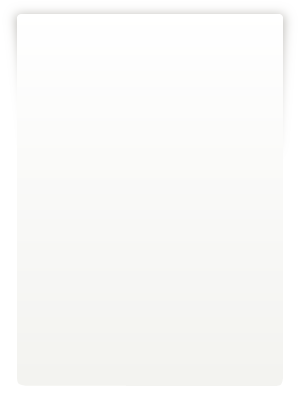
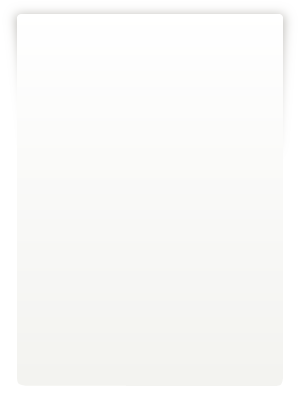
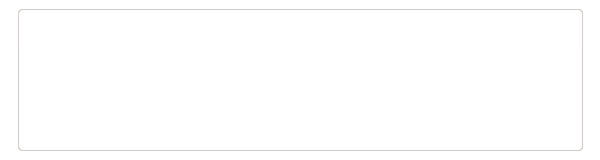
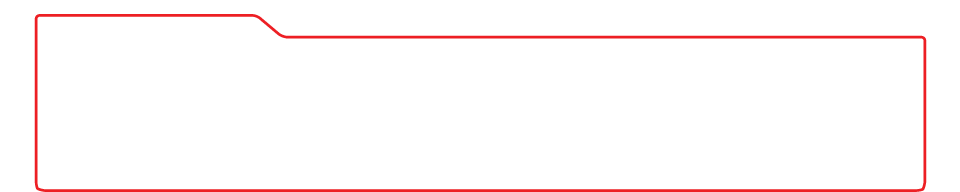
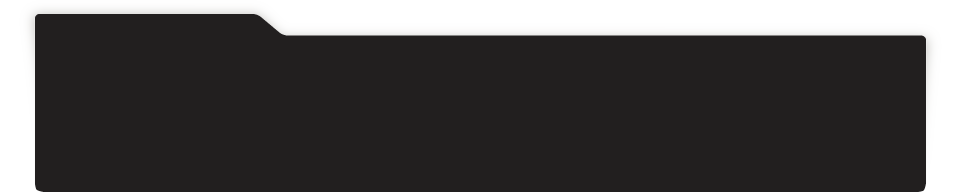
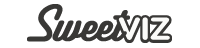
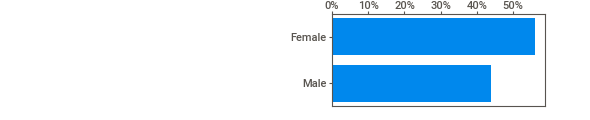
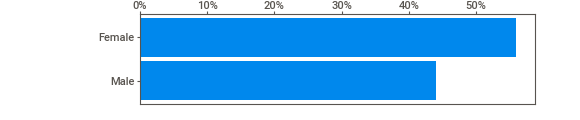
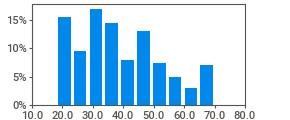
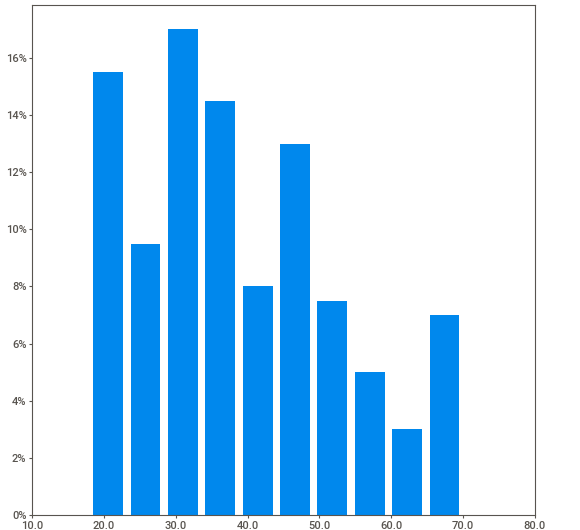
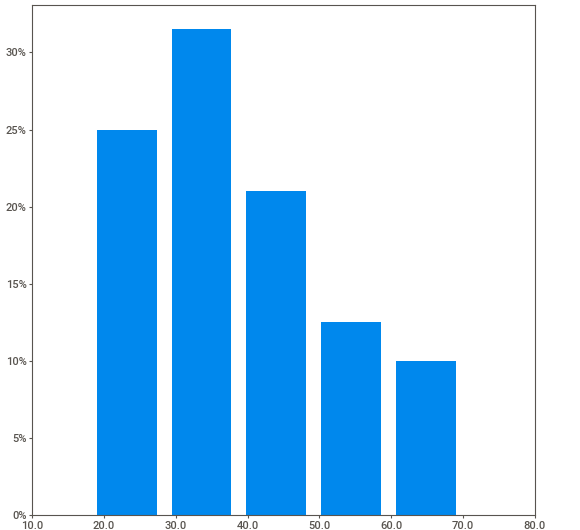
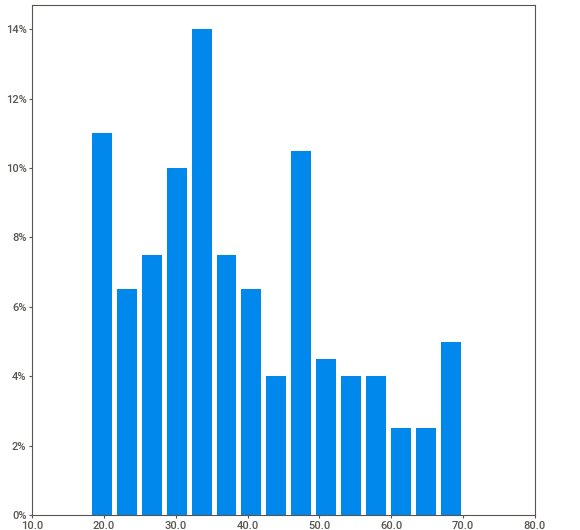
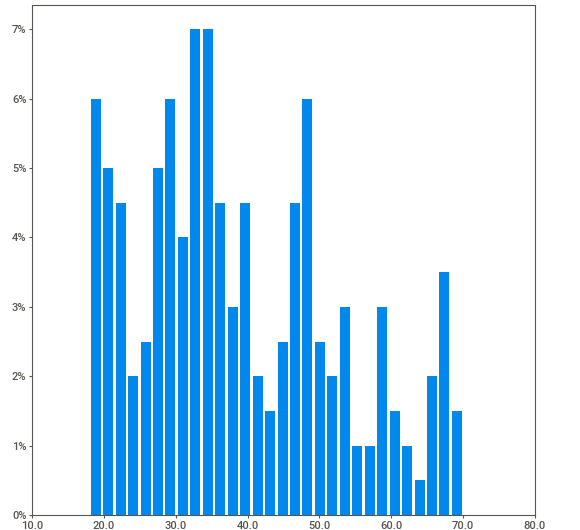
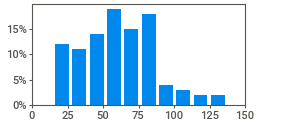
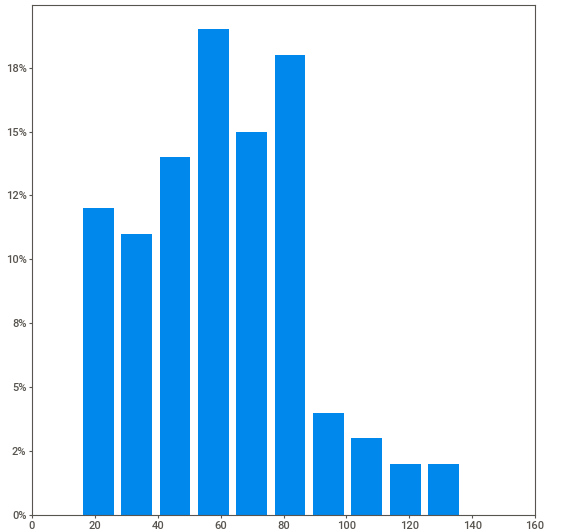
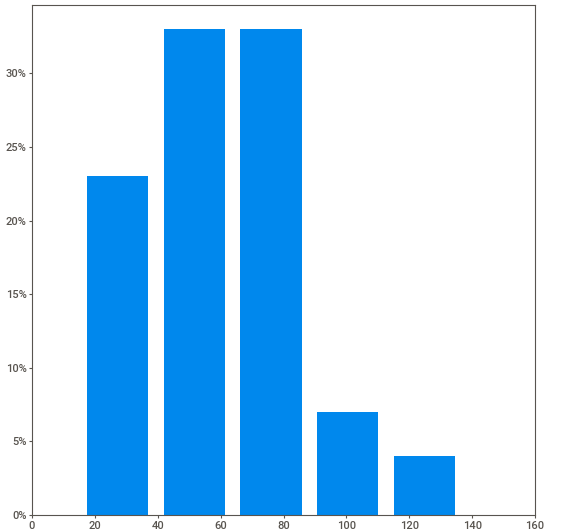
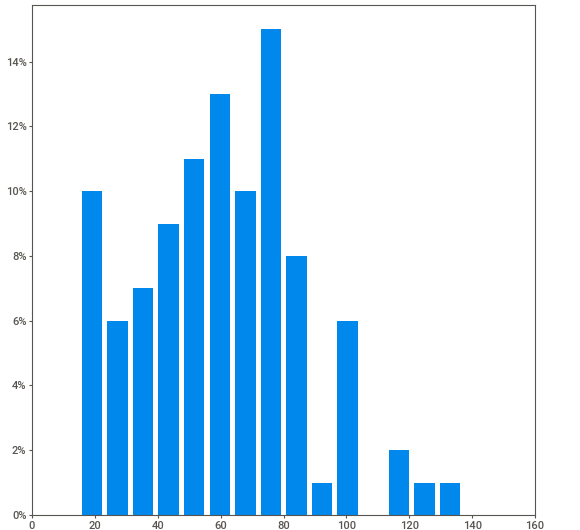
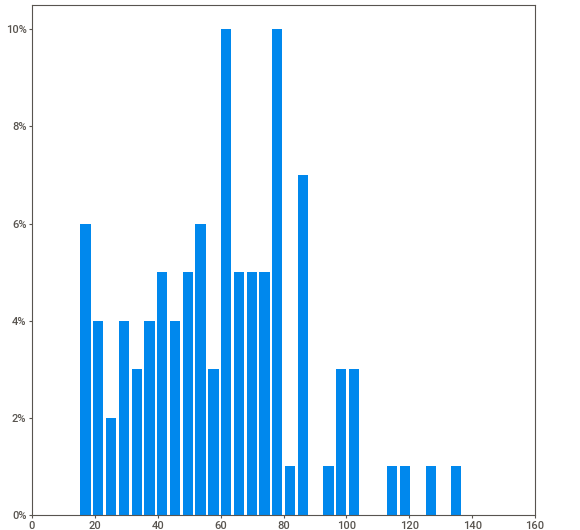
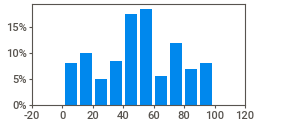
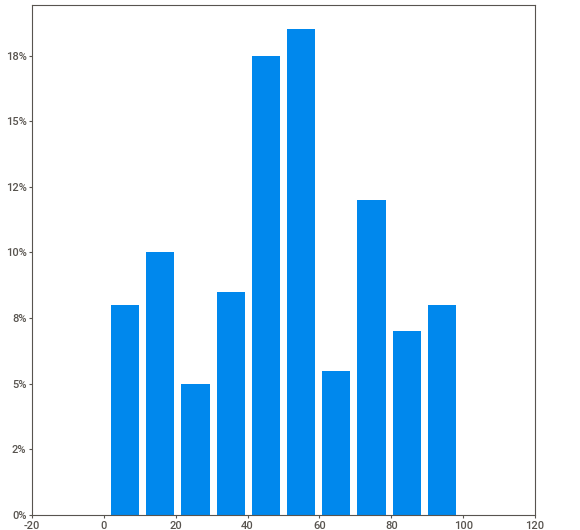
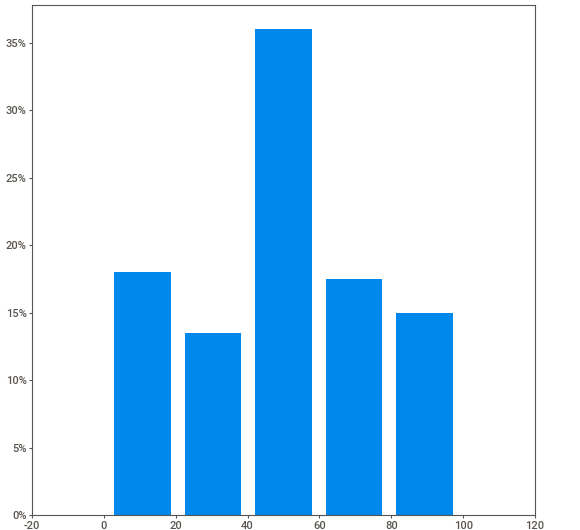
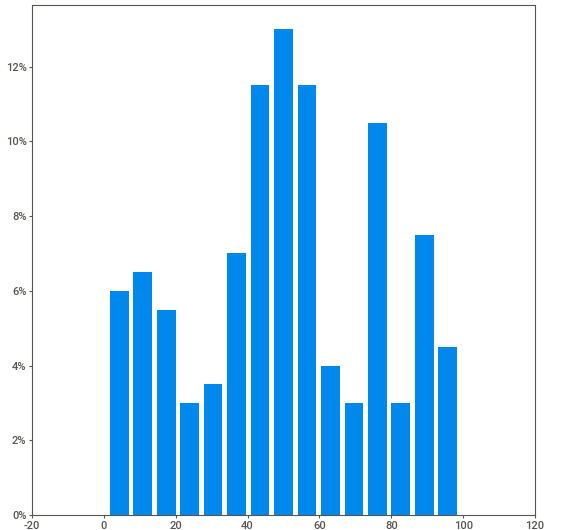
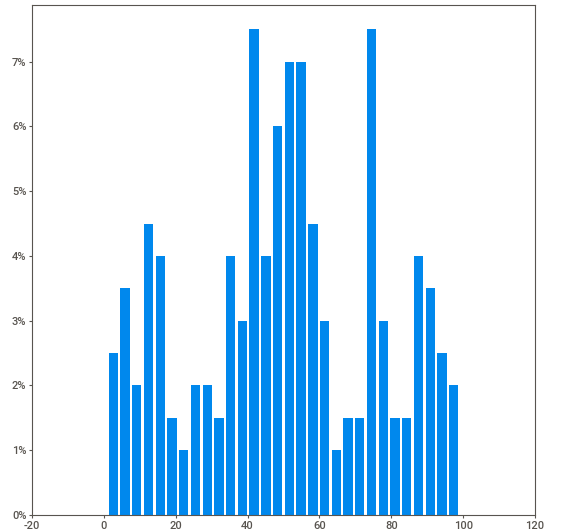
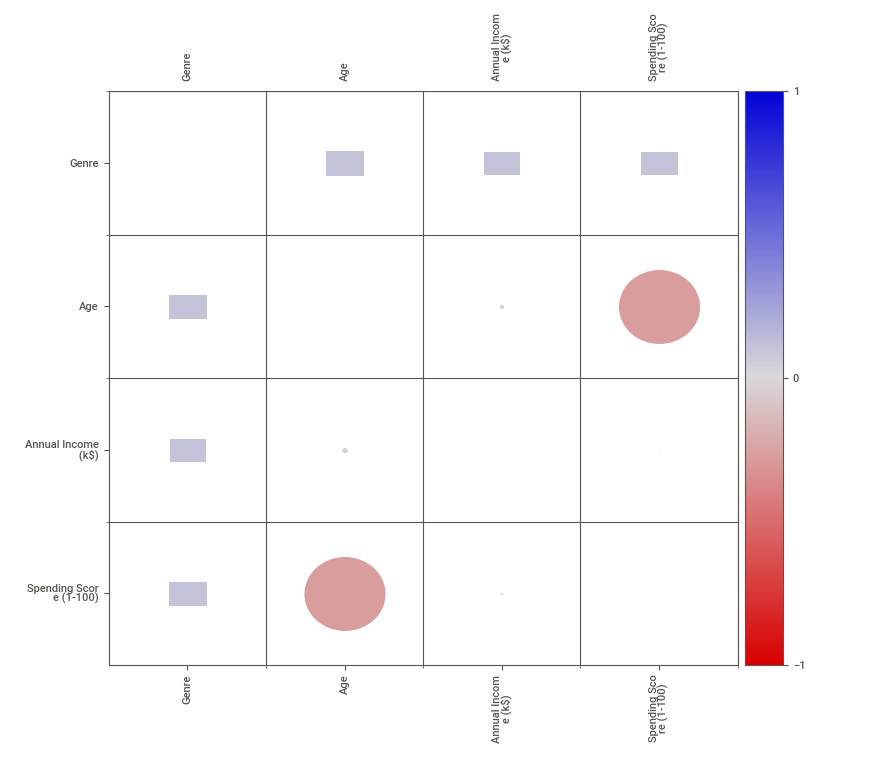
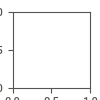

In [7]:
import sweetviz 
sz=sweetviz.analyze(df.drop('CustomerID',axis=1))
sz.show_notebook()

<AxesSubplot:xlabel='Age', ylabel='count'>

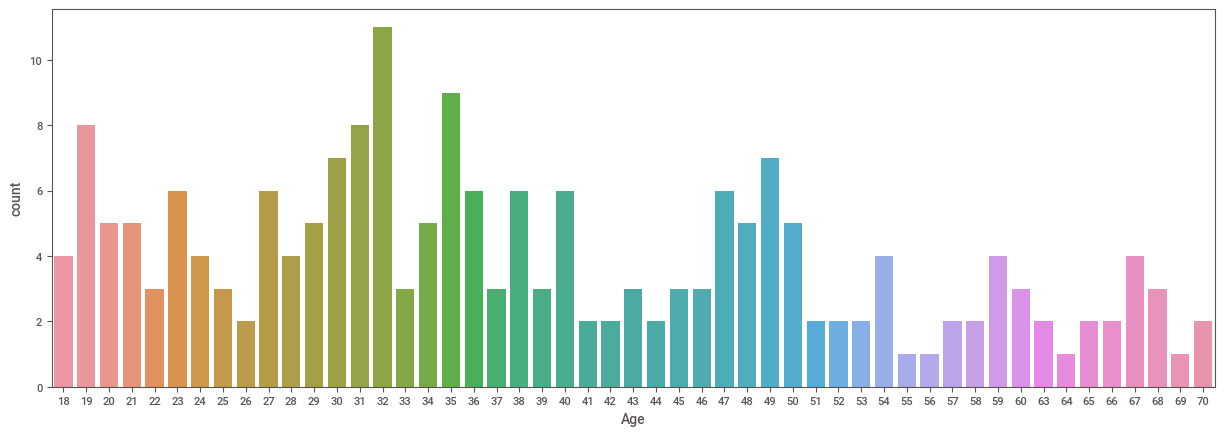

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x='Age',data=df,ax=ax)

<AxesSubplot:xlabel='Age', ylabel='count'>

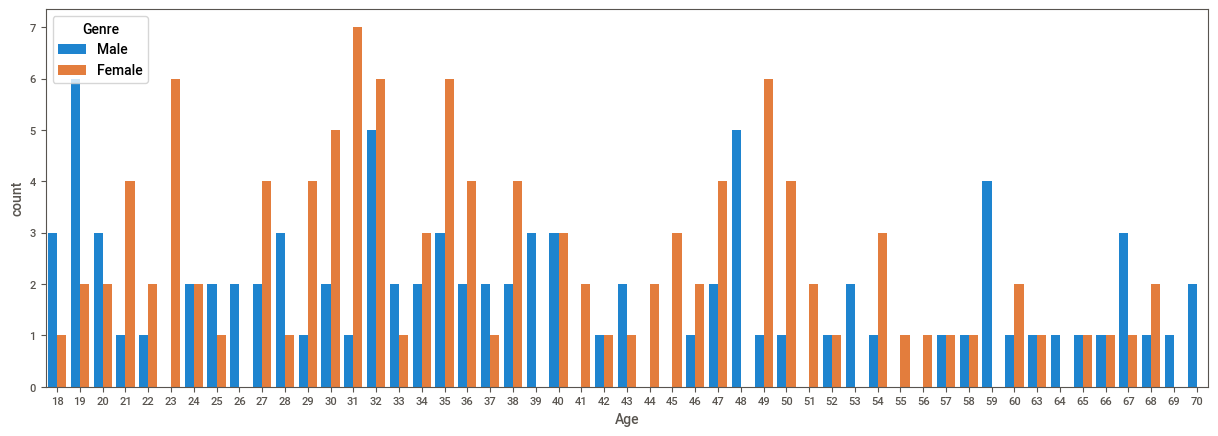

In [9]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x='Age',data=df,hue='Genre',ax=ax)

In [10]:
#The post between 27 to  36 are high
#Female cutomers are higher than nmale customers
# At age 30 we having more cutomers 

In [11]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [12]:
#No of Female cutomers is 112
#No of Male cutomers is 88

<AxesSubplot:xlabel='Genre', ylabel='count'>

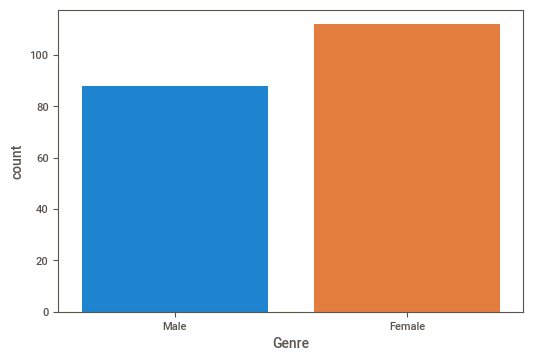

In [13]:
sns.countplot(x='Genre',data=df)

## Bivariate data

In [14]:
#rename columns
df.rename({'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},axis=1,inplace=True)


In [15]:
df

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


<AxesSubplot:xlabel='Age', ylabel='Count'>

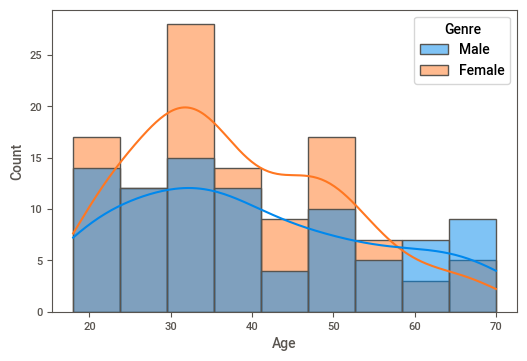

In [16]:
sns.histplot(x='Age',data=df,kde=True,hue='Genre')

In [17]:
#

<AxesSubplot:xlabel='Annual_Income', ylabel='Count'>

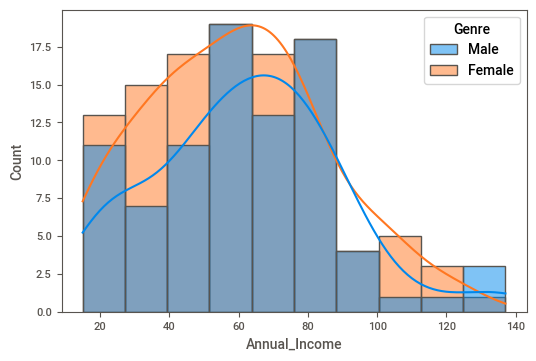

In [18]:
sns.histplot(x='Annual_Income',data=df,kde=True,hue='Genre')

<AxesSubplot:xlabel='Spending_Score', ylabel='Count'>

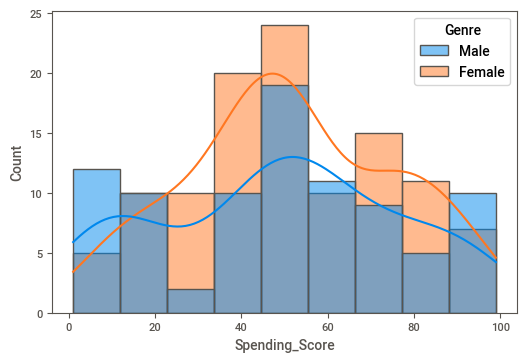

In [19]:
sns.histplot(x='Spending_Score',data=df,kde=True,hue='Genre')

## Data processing

In [20]:
#null values
df.isnull().sum()

CustomerID        0
Genre             0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [21]:
#no null values

In [22]:
#duplicate values
df.duplicated().sum()

0

In [23]:
#no duplicate values

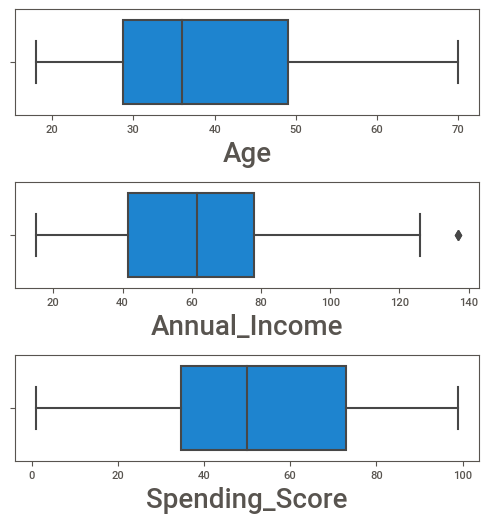

In [24]:
#outliers
#outliers
box=df[['Age','Annual_Income','Spending_Score']]
plt.figure(figsize=(5,10), facecolor='white')#to sey canvas size
plotnumber = 1#counter

for column in box:#acc
    if plotnumber<=7 : # as there are 9 columns in the data
        ax = plt.subplot(6,1,plotnumber)#plotting 6 graphs
        sns.boxplot(x=box[column])#boxplot to check for outlier
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
     
    plotnumber+=1#counter increment 
plt.tight_layout()#to show plot

In [25]:
#outliers treatment
from scipy import stats
IQR = stats.iqr(df.Annual_Income, interpolation = 'midpoint') #calculating Inter quantile range
IQR
Q1=df.Annual_Income.quantile(0.25)#defining 25% of data
Q3=df.Annual_Income.quantile(0.75)##defining 75% of data
min_limit=Q1 - 1.5*IQR#setting minimum limit


max_limit=Q3 + 1.5*IQR#setting maximum limit

In [26]:
print(max_limit,min_limit)

133.5 -14.0


In [27]:
df[df['Annual_Income']>max_limit]

,CustomerID,Genre,Age,Annual_Income,Spending_Score
198,199,Male,32,137,18
199,200,Male,30,137,83


In [28]:
df.Annual_Income[df.Annual_Income>max_limit]=max_limit


<ipython-input-28-6b3951315034>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Annual_Income[df.Annual_Income>max_limit]=max_limit


<AxesSubplot:xlabel='Annual_Income'>

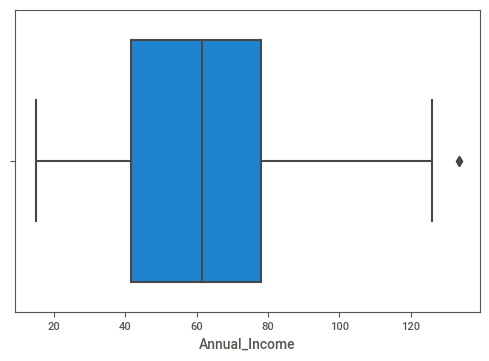

In [29]:
#after outlier treatment
sns.boxplot(x='Annual_Income',data=df)

In [30]:
#replace categorical to numerical
df['Genre'].replace('Male',0,inplace=True)
df['Genre'].replace('Female',1,inplace=True)

In [31]:
df

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,0,19,15.0,39
1,2,0,21,15.0,81
2,3,1,20,16.0,6
3,4,1,23,16.0,77
4,5,1,31,17.0,40
...,...,...,...,...,...
195,196,1,35,120.0,79
196,197,1,45,126.0,28
197,198,0,32,126.0,74
198,199,0,32,133.5,18


In [37]:
#drop customer_id
df.drop('CustomerID',axis=1,inplace=True,)

KeyError: "['CustomerID'] not found in axis"

In [38]:
df

,Genre,Age,Annual_Income,Spending_Score
0,0,19,15.0,39
1,0,21,15.0,81
2,1,20,16.0,6
3,1,23,16.0,77
4,1,31,17.0,40
...,...,...,...,...
195,1,35,120.0,79
196,1,45,126.0,28
197,0,32,126.0,74
198,0,32,133.5,18


In [45]:
x_scalar=df.iloc[:,1::] #drop Genre
x_scalar

,Age,Annual_Income,Spending_Score
0,19,15.0,39
1,21,15.0,81
2,20,16.0,6
3,23,16.0,77
4,31,17.0,40
...,...,...,...
195,35,120.0,79
196,45,126.0,28
197,32,126.0,74
198,32,133.5,18


In [55]:
#scalar transformation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scalar=sc.fit_transform(x_scalar)

In [56]:
x_scalar #converted to scalar

array([[-1.42456879, -1.74432089, -0.43480148],
       [-1.28103541, -1.74432089,  1.19570407],
       [-1.3528021 , -1.70600522, -1.71591298],
       [-1.13750203, -1.70600522,  1.04041783],
       [-0.56336851, -1.66768955, -0.39597992],
       [-1.20926872, -1.66768955,  1.00159627],
       [-0.27630176, -1.62937388, -1.71591298],
       [-1.13750203, -1.62937388,  1.70038436],
       [ 1.80493225, -1.59105821, -1.83237767],
       [-0.6351352 , -1.59105821,  0.84631002],
       [ 2.02023231, -1.59105821, -1.4053405 ],
       [-0.27630176, -1.59105821,  1.89449216],
       [ 1.37433211, -1.55274254, -1.36651894],
       [-1.06573534, -1.55274254,  1.04041783],
       [-0.13276838, -1.55274254, -1.44416206],
       [-1.20926872, -1.55274254,  1.11806095],
       [-0.27630176, -1.51442687, -0.59008772],
       [-1.3528021 , -1.51442687,  0.61338066],
       [ 0.94373197, -1.43779553, -0.82301709],
       [-0.27630176, -1.43779553,  1.8556706 ],
       [-0.27630176, -1.39947986, -0.590

## Feature selection

<AxesSubplot:>

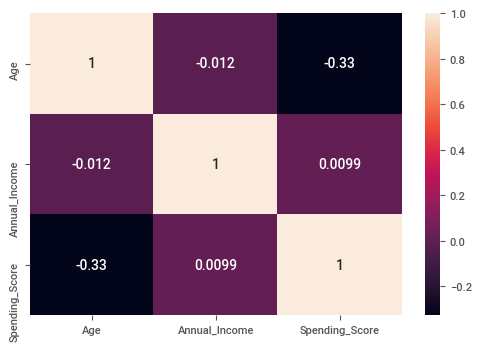

In [67]:
sns.heatmap(df.drop('Genre',axis=1).corr(),annot=True)

## model building

In [183]:
x=df.iloc[:,2::] #drop Age
x

,Annual_Income,Spending_Score
0,15.0,39
1,15.0,81
2,16.0,6
3,16.0,77
4,17.0,40
...,...,...
195,120.0,79
196,126.0,28
197,126.0,74
198,133.5,18


C:\Users\Deepak Raj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


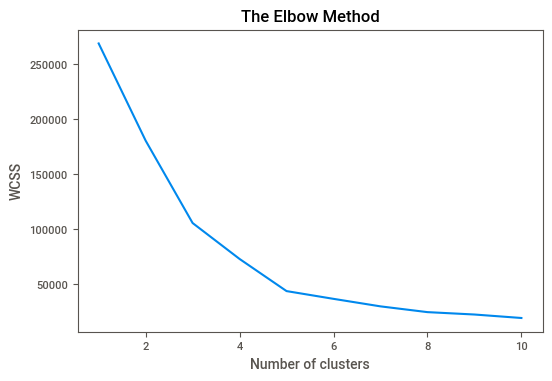

In [190]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#elbow value is 5

In [191]:
#import kmeans
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5,random_state=42)#n_clusters is 5
model=km.fit(x)#fit x dataset

In [192]:
#labels of clusters
model.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [193]:
#centroid of clusters
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.1       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.44871795, 82.12820513]])

In [194]:
#color for clusters
color_scheme = np.array(['red','blue','green','yellow','violet'])

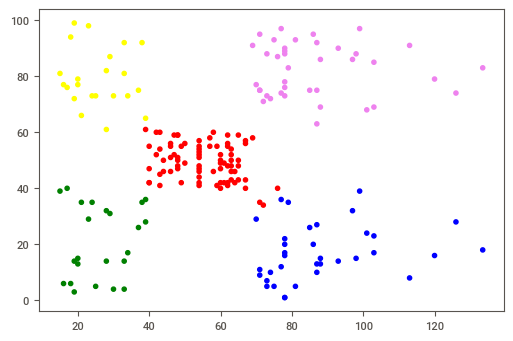

In [195]:
#after clustering
plt.scatter(df.Annual_Income,df.Spending_Score,color=color_scheme[model.labels_])